<a href="https://colab.research.google.com/github/cesareyesantos/Reading-output-dlis-files-FMI/blob/main/Plotting_oriented_dlis_Canunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing dlisio
!pip install dlisio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.8/743.8 kB 9.1 MB/s eta 0:00:00


In [2]:
#import  dlisio and load the data from dlis file as it is shown, to use the only existing logical file
from dlisio import dlis as dl
f = dl.load("canunda_3_fmi_proc_dynamic.dlis")[0]

In [3]:
#desbribe the logical file extracted
f.describe()

------------
Logical File
------------
Description : LogicalFile(ConPr_S1R2_FMIMain_FBST_MAST_PPC)
Frames      : 1
Channels    : 18

Known objects
--
CHANNEL     : 18
TOOL        : 2
PARAMETER   : 806
FILE-HEADER : 1
ORIGIN      : 2
FRAME       : 1


In [4]:
#print the frames, in this case only one, and their channels saved inside the logical file
for frame in f.frames:
  for channel in frame.channels:
    if channel.name == frame.index:
      depth_units = channel.units

  print(frame.name)
  print(str(frame.channels))
  print("\n")

1B
[Channel(TDEP), Channel(BS), Channel(C1_S), Channel(C2_S), Channel(DEVIM_S), Channel(FLAP_1_DYNAMIC), Channel(FLAP_2_DYNAMIC), Channel(FLAP_3_DYNAMIC), Channel(FLAP_4_DYNAMIC), Channel(GR_EDTC_S), Channel(HAZIM_S), Channel(P1AZ_FBST), Channel(P1NO_FBST_S), Channel(PAD_1_DYNAMIC), Channel(PAD_2_DYNAMIC), Channel(PAD_3_DYNAMIC), Channel(PAD_4_DYNAMIC), Channel(RB_FBST_S)]




In [5]:
#extract the frame with the image logs
frame1 = f.object("FRAME", "1B")
frame1.describe()

-----
Frame
-----
name   : 1B
origin : 127
copy   : 0

Channel indexing
--
Indexed by    : BOREHOLE-DEPTH
Index units   : m
Index min     : 2294.999267578125 [m]
Index max     : 2809.275634765625 [m]
Direction     : DECREASING
Index channel : Channel(TDEP)

Channels
--
TDEP           BS             C1_S           C2_S           DEVIM_S
FLAP_1_DYNAMIC FLAP_2_DYNAMIC FLAP_3_DYNAMIC FLAP_4_DYNAMIC GR_EDTC_S
HAZIM_S        P1AZ_FBST      P1NO_FBST_S    PAD_1_DYNAMIC  PAD_2_DYNAMIC
PAD_3_DYNAMIC  PAD_4_DYNAMIC  RB_FBST_S

In [6]:
# as a way to understand clearly what is the data stored in each channel the autor who develop the initial code to plot the data, develop the following function
import pandas as pd
def summarize(objs, **kwargs):
    """Create a pd.DataFrame that summarize the content of 'objs', One
    object pr. row

    Parameters
    ----------

    objs : list()
        list of metadata objects

    **kwargs
        Keyword arguments
        Use kwargs to tell summarize() which fields (attributes) of the
        objects you want to include in the DataFrame. The parameter name
        must match an attribute on the object in 'objs', while the value
        of the parameters is used as a column name. Any kwargs are excepted,
        but if the object does not have the requested attribute, 'KeyError'
        is used as the value.

    Returns
    -------

    summary : pd.DataFrame
    """
    summary = []
    for attr, label in kwargs.items():
        column = []
        for obj in objs:
            try:
                value = getattr(obj, attr)
            except AttributeError:
                value = 'KeyError'

            column.append(value)
        summary.append(column)

    summary = pd.DataFrame(summary).T
    summary.columns = kwargs.values()
    return summary

In [7]:
channel_table = summarize(
    f.channels,
    name='Name',
    long_name='Long name',
    units='Units',
    dimension='Dimension',
    frame='Frame')

channel_table.sort_values('Name')

display(channel_table)

,Name,Long name,Units,Dimension,Frame
0,TDEP,Tool Depth,m,[1],Frame(1B)
1,BS,Bit Size,in,[1],Frame(1B)
2,C1_S,Caliper 1,in,[1],Frame(1B)
3,C2_S,Caliper 2,in,[1],Frame(1B)
4,DEVIM_S,Memorized Deviation,deg,[1],Frame(1B)
5,FLAP_1_DYNAMIC,FMI_Flap-A DYNAMIC,,[24],Frame(1B)
6,FLAP_2_DYNAMIC,FMI_Flap-B DYNAMIC,,[24],Frame(1B)
7,FLAP_3_DYNAMIC,FMI_Flap-C DYNAMIC,,[24],Frame(1B)
8,FLAP_4_DYNAMIC,FMI_Flap-D DYNAMIC,,[24],Frame(1B)
9,GR_EDTC_S,Gamma Ray,gAPI,[1],Frame(1B)


In [8]:
#due some long names are really long, it required print them one by one to read it conpletely
long_names=channel_table['Long name']
long_names[11]

'Pad 1 Azimuth in Horizontal Plane (0 = True North), memorized to FBST'

In [9]:
#using the function curves extract all the data stored in the frame
curves = frame1.curves()

In [10]:
#initialized a variable to store the data from a channel
fmfa_curves = curves["FLAP_1_DYNAMIC"]
fmfa_curves.shape
#as it is shown this array does npt have an additional dimension

(202472, 24)

In [11]:
#import required libraries, iniatialized the depth and change its units from meters to ft
import numpy as np
import pandas as pd
from sklearn import preprocessing
depth = curves[frame1.index]*3.28
#Removed the unnecesary array dimension, for this case it is not required permormed thisnoperation
fmfa_curvesclean = np.squeeze(fmfa_curves)
fmfa_curvesclean.shape

(202472, 24)

In [12]:
#perform the same procedure did with FMFA with a different channel
fmpa_curves = curves["PAD_1_DYNAMIC"]
fmpa_curvesclean = np.squeeze(fmpa_curves)
fmpa_curvesclean

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [13]:
#as the process with the first channels was successfull, is applied to the remaining channels
fmpb_curves = curves["FLAP_2_DYNAMIC"]
fmpb_curvesclean = np.squeeze(fmpb_curves)
fmfb_curves = curves["PAD_2_DYNAMIC"]
fmfb_curvesclean = np.squeeze(fmfb_curves)
fmpc_curves = curves["FLAP_3_DYNAMIC"]
fmpc_curvesclean = np.squeeze(fmpc_curves)
fmfc_curves = curves["PAD_3_DYNAMIC"]
fmfc_curvesclean = np.squeeze(fmfc_curves)
fmpd_curves = curves["FLAP_4_DYNAMIC"]
fmpd_curvesclean = np.squeeze(fmpd_curves)
fmfd_curves = curves["PAD_4_DYNAMIC"]
fmfd_curvesclean = np.squeeze(fmfd_curves)
"""
These lines of code could be used and adjusted in case of having 16 channels with 12 microresistivity measures each one
fmpe_curves = curves["FCC1"]
fmpe_curvesclean = np.squeeze(fmpe_curves)
fmfe_curves = curves["FCC2"]
fmfe_curvesclean = np.squeeze(fmfe_curves)
fmpf_curves = curves["FCC3"]
fmpf_curvesclean = np.squeeze(fmpf_curves)
fmff_curves = curves["FCC4"]
fmff_curvesclean = np.squeeze(fmff_curves)
fmpg_curves = curves["FCD1"]
fmpg_curvesclean = np.squeeze(fmpg_curves)
fmfg_curves = curves["FCD2"]
fmfg_curvesclean = np.squeeze(fmfg_curves)
fmph_curves = curves["FCD3"]
fmph_curvesclean = np.squeeze(fmph_curves)
fmfh_curves = curves["FCD4"]
fmfh_curvesclean = np.squeeze(fmfh_curves)"""

'\nThese lines of code could be used and adjusted in case of having 16 channels with 12 microresistivity measures each one\nfmpe_curves = curves["FCC1"]\nfmpe_curvesclean = np.squeeze(fmpe_curves)\nfmfe_curves = curves["FCC2"]\nfmfe_curvesclean = np.squeeze(fmfe_curves)\nfmpf_curves = curves["FCC3"]\nfmpf_curvesclean = np.squeeze(fmpf_curves)\nfmff_curves = curves["FCC4"]\nfmff_curvesclean = np.squeeze(fmff_curves)\nfmpg_curves = curves["FCD1"]\nfmpg_curvesclean = np.squeeze(fmpg_curves)\nfmfg_curves = curves["FCD2"]\nfmfg_curvesclean = np.squeeze(fmfg_curves)\nfmph_curves = curves["FCD3"]\nfmph_curvesclean = np.squeeze(fmph_curves)\nfmfh_curves = curves["FCD4"]\nfmfh_curvesclean = np.squeeze(fmfh_curves)'

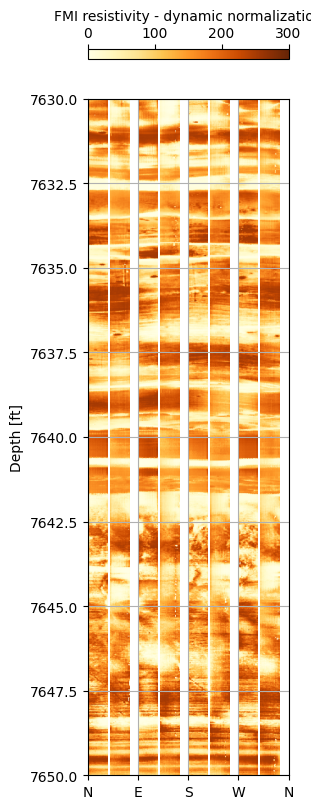

In [14]:
#generate graphs from sample graph https://github.com/ICWallis/borehole-image-analysis-with-python/blob/main/7_DLIS_files.ipynb
#This is an unoriented image
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

import logging


def paint_channel(ax, curve, y_axis, x_axis, **kwargs):
    """Plot an image channel into an axes using an index channel for the y-axis

    Parameters
    ----------²

        ax : matplotlib.axes

        curve : numpy array
            The curve to be plotted

        index : numpy array
            The depth index as a Channel object (slower) or a numpy array (faster)

        **kwargs : dict
            Keyword arguments to be passed on to ax.imshow()
    """
    # Determine the extent of the image so that the pixel centres correspond with the correct axis values
    dx = np.mean(x_axis[1:] - x_axis[:-1])
    dy = np.mean(y_axis[1:] - y_axis[:-1])
    extent = (x_axis[0] - dx/2, x_axis[-1] + dx/2, y_axis[0] - dy/2, y_axis[-1] + dy/2)

    # Determine the correct orientation of the image
    if y_axis[1] < y_axis[0]:   # Frame recorded from the bottom to the top of the well
        origin = 'lower'
    else:                       # Frame recorded from the top to the bottom of the well
        origin = 'upper'

    return ax.imshow(curve, aspect='auto', origin=origin, extent=extent, **kwargs)


# Plot the image log
fig, ax = plt.subplots(1,1, figsize=(3,8), sharey=True, constrained_layout=True)

ang = np.arange(20)

"""
The original fuction used an image which is oriented with the data stored inside a channel, this australian well has 8 channeks
The current understanding of the problem only made possible plot each cleaned channel assuming a width to cover the 360°
As it is mentioned this image show an unoriented plot of the channels
"""

imfa = paint_channel(ax, fmfa_curvesclean, depth, np.arange(40, 75), cmap='YlOrBr', vmin=0, vmax=300)
impa = paint_channel(ax, fmpa_curvesclean, depth, np.arange(35), cmap='YlOrBr', vmin=0, vmax=300)
imfb = paint_channel(ax, fmfb_curvesclean, depth, np.arange(90,125), cmap='YlOrBr', vmin=0, vmax=300)
impb = paint_channel(ax, fmpb_curvesclean, depth, np.arange(130,165), cmap='YlOrBr', vmin=0, vmax=300)
imfc = paint_channel(ax, fmfc_curvesclean, depth, np.arange(180, 215), cmap='YlOrBr', vmin=0, vmax=300)
impc = paint_channel(ax, fmpc_curvesclean, depth, np.arange(220, 255), cmap='YlOrBr', vmin=0, vmax=300)
imfd = paint_channel(ax, fmfd_curvesclean, depth, np.arange(270,305), cmap='YlOrBr', vmin=0, vmax=300)
impd = paint_channel(ax, fmpd_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=0, vmax=300)
"""
These lines of code could be used in the case of 16 channels
imfe = paint_channel(ax, fmfe_curvesclean, depth, np.arange(580,615), cmap='YlOrBr', vmin=-500, vmax=1000)
impe = paint_channel(ax, fmpe_curvesclean, depth, np.arange(540, 575), cmap='YlOrBr', vmin=-500, vmax=1000)
imff = paint_channel(ax, fmff_curvesclean, depth, np.arange(490, 525), cmap='YlOrBr', vmin=-500, vmax=1000)
impf = paint_channel(ax, fmpf_curvesclean, depth, np.arange(450, 485), cmap='YlOrBr', vmin=-500, vmax=1000)
imfg = paint_channel(ax, fmfg_curvesclean, depth, np.arange(400,435),cmap='YlOrBr', vmin=-500, vmax=1000)
impg = paint_channel(ax, fmpg_curvesclean, depth, np.arange(360, 395),  cmap='YlOrBr', vmin=-500, vmax=1000)
imfh = paint_channel(ax, fmfh_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=-500, vmax=1000)
imph = paint_channel(ax, fmph_curvesclean, depth, np.arange(270, 305), cmap='YlOrBr', vmin=-500, vmax=1000)
"""
cbar = fig.colorbar(imfa, ax=ax, location='top')
cbar.set_label('FMI resistivity - dynamic normalization')
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_xticklabels(['N', 'E', 'S', 'W', 'N'])

ax.grid(True)

#ax.set_xlabel('Azimuthal angle from north [°]')
ax.set_ylabel('Depth [ft]')

ax.set_ylim(7650, 7630)

plt.show()

In [15]:
#to orientate image import curves from P1AZ channel
P1AZ = curves["P1AZ_FBST"]
P1AZ_curvesclean = np.squeeze(P1AZ)
P1AZ_curvesclean

array([12.77111 , 12.771111, 12.77111 , ..., 82.6282  , 82.65513 ,
       82.68206 ], dtype=float32)

In [16]:
# create two arrays filled with zeros a little one to be placed between the corresponding pair of flap and pad, and a bigger one between the pairs
blank_big = np.zeros((202472,11))
blank_small = np.zeros((202472,4))
#Concatenate all the arrays of image data, spacing with the blanck arrays created previously
sum1 =np.concatenate((fmpa_curvesclean, blank_small, fmfa_curvesclean,blank_big,fmfb_curvesclean,blank_small,fmpb_curvesclean,blank_big,fmfc_curvesclean,blank_small,fmpc_curvesclean,blank_big,fmfd_curvesclean,blank_small,fmpd_curvesclean,blank_big), axis=1)
#Due to the total quantity of columns of data concatenated is 252 and the number of P1AZ is angle in °, we have to multiply its value by 252 and divide in 360 . This willl represent the position counted as colums where P1 AZ will be plotted, but as ussually it is represented in the middle of the pad, it is required substract 12
#As the result is an array of floats we need remove the decimal to use this array as an indicator of the position we need move each row of data
displacing1 = np.ceil((P1AZ_curvesclean)*252/360-12)
#As performed a substraction is possible the presence of negative value for that adding 252 we could solve the inconvenient and  it is logical because if th P1AZ is near the North the extrem record should be in the other side of the plot
displacing2 = np.where(displacing1<=0, displacing1+252, displacing1)
#Currently we have integers inside an array with float data type, tat is the reason of the next operation
displacing = displacing2.astype("i")
#Aterwards the rotation of the rolling of each row according the array previouly created, the solution was took from stack over flow https://stackoverflow.com/questions/20360675/roll-rows-of-a-matrix-independently

rows, column_indices = np.ogrid[:sum1.shape[0], :sum1.shape[1]]

# Always use a negative shift, so that column_indices are valid.
# Alternative: r %= A.shape[1]
displacing[displacing < 0] += sum1.shape[1]
column_indices = column_indices - displacing[:, np.newaxis]

result = sum1[rows, column_indices]
result

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

/tmp/ipython-input-17-810328782.py:75: UserWarning: Adding colorbar to a different Figure <Figure size 300x800 with 2 Axes> than <Figure size 300x800 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(imfa, ax=ax, location='top')


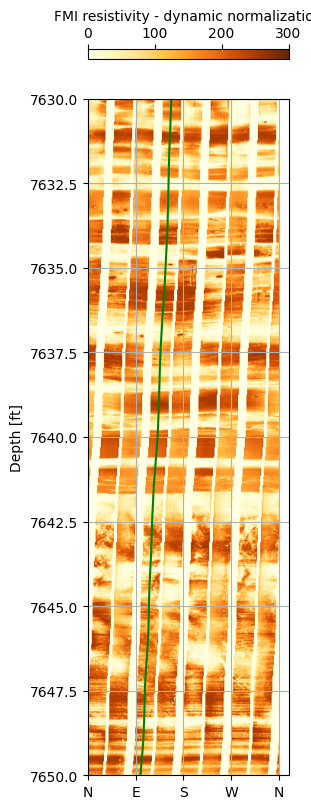

In [17]:
#generate graphs from sample graph https://github.com/ICWallis/borehole-image-analysis-with-python/blob/main/7_DLIS_files.ipynb
#Differently with the first grapic ploted, here we have an only array which is a condition more similar to the example previouly mentioned
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

import logging


def paint_channel(ax, curve, y_axis, x_axis, **kwargs):
    """Plot an image channel into an axes using an index channel for the y-axis

    Parameters
    ----------²

        ax : matplotlib.axes

        curve : numpy array
            The curve to be plotted

        index : numpy array
            The depth index as a Channel object (slower) or a numpy array (faster)

        **kwargs : dict
            Keyword arguments to be passed on to ax.imshow()
    """
    # Determine the extent of the image so that the pixel centres correspond with the correct axis values
    dx = np.mean(x_axis[1:] - x_axis[:-1])
    dy = np.mean(y_axis[1:] - y_axis[:-1])
    extent = (x_axis[0] - dx/2, x_axis[-1] + dx/2, y_axis[0] - dy/2, y_axis[-1] + dy/2)

    # Determine the correct orientation of the image
    if y_axis[1] < y_axis[0]:   # Frame recorded from the bottom to the top of the well
        origin = 'lower'
    else:                       # Frame recorded from the top to the bottom of the well
        origin = 'upper'

    return ax.imshow(curve, aspect='auto', origin=origin, extent=extent, **kwargs)


# Plot the image log
fig, ax = plt.subplots(1,1, figsize=(3,8), sharey=True, constrained_layout=True)

ang = np.arange(20)

"""
The original fuction used a image which is oriented
Currently we have an array with image data orientated
Additionally plot P1AZ
"""

#imfa = paint_channel(ax, fmfa_curvesclean, depth, np.arange(40, 75), cmap='YlOrBr', vmin=0, vmax=300)
impa = paint_channel(ax, result, depth, np.arange(360),cmap='YlOrBr', vmin=0, vmax=300)
#imfb = paint_channel(ax, fmfb_curvesclean, depth, np.arange(90,125), cmap='YlOrBr', vmin=0, vmax=300)
#impb = paint_channel(ax, fmpb_curvesclean, depth, np.arange(130,165), cmap='YlOrBr', vmin=0, vmax=300)
#imfc = paint_channel(ax, fmfc_curvesclean, depth, np.arange(180, 215), cmap='YlOrBr', vmin=0, vmax=300)
#impc = paint_channel(ax, fmpc_curvesclean, depth, np.arange(220, 255), cmap='YlOrBr', vmin=0, vmax=300)
#imfd = paint_channel(ax, fmfd_curvesclean, depth, np.arange(270,305), cmap='YlOrBr', vmin=0, vmax=300)
#impd = paint_channel(ax, fmpd_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=0, vmax=300)
imp1 = ax.plot( P1AZ_curvesclean, depth, color ="green")
"""
Alternativelly we can remove these  other channels because always we are going to have only an array of orientaed data, this could be applied in the unorientated plot concatenating data from flaps, pads and blank spaces
imfe = paint_channel(ax, fmfe_curvesclean, depth, np.arange(580,615), cmap='YlOrBr', vmin=-500, vmax=1000)
impe = paint_channel(ax, fmpe_curvesclean, depth, np.arange(540, 575), cmap='YlOrBr', vmin=-500, vmax=1000)
imff = paint_channel(ax, fmff_curvesclean, depth, np.arange(490, 525), cmap='YlOrBr', vmin=-500, vmax=1000)
impf = paint_channel(ax, fmpf_curvesclean, depth, np.arange(450, 485), cmap='YlOrBr', vmin=-500, vmax=1000)
imfg = paint_channel(ax, fmfg_curvesclean, depth, np.arange(400,435),cmap='YlOrBr', vmin=-500, vmax=1000)
impg = paint_channel(ax, fmpg_curvesclean, depth, np.arange(360, 395),  cmap='YlOrBr', vmin=-500, vmax=1000)
imfh = paint_channel(ax, fmfh_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=-500, vmax=1000)
imph = paint_channel(ax, fmph_curvesclean, depth, np.arange(270, 305), cmap='YlOrBr', vmin=-500, vmax=1000)
"""
cbar = fig.colorbar(imfa, ax=ax, location='top')
cbar.set_label('FMI resistivity - dynamic normalization')
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_xticklabels(['N', 'E', 'S', 'W', 'N'])

ax.grid(True)

#ax.set_xlabel('Azimuthal angle from north [°]')
ax.set_ylabel('Depth [ft]')

ax.set_ylim(7650, 7630)

plt.show()

In [18]:
#to orientate image import curves from P1NO, measured aound the orthogonal plane to the sonde, bit how this hole is vertical no rrpresentative change could be observed
P1NO = curves["P1NO_FBST_S"]
P1NO_curvesclean1 = np.squeeze(P1NO)
P1NO_curvesclean=np.where(P1NO_curvesclean1==-9999.0,0,P1NO_curvesclean1)
P1NO_curvesclean

array([12.770016, 12.770017, 12.770017, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [19]:
import numpy as np
import random
blank_big = np.zeros((202472,11))
blank_small = np.zeros((202472,4))
sum1 =np.concatenate((fmpa_curvesclean, blank_small, fmfa_curvesclean,blank_big,fmfb_curvesclean,blank_small,fmpb_curvesclean,blank_big,fmfc_curvesclean,blank_small,fmpc_curvesclean,blank_big,fmfd_curvesclean,blank_small,fmpd_curvesclean,blank_big), axis=1)
sum1
displacing1 = np.ceil((P1NO_curvesclean)*252/360-12)
displacing2 = np.where(displacing1<=0, displacing1+252, displacing1)

displacing = displacing2.astype("i")
displacing

rows, column_indices = np.ogrid[:sum1.shape[0], :sum1.shape[1]]

# Always use a negative shift, so that column_indices are valid.
# Alternative: r %= A.shape[1]
displacing[displacing < 0] += sum1.shape[1]
column_indices = column_indices - displacing[:, np.newaxis]

result = sum1[rows, column_indices]
# Assuming you want to fill the array with a specific integer value, e.g., 0.
#isplacing = [np.random.randint(1,20) for i in range(202472)]
#isplacing
#isplaced = [np.roll(sum(i), displacing(i)) for in range(202472)]
#isplaced"""
result

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

/tmp/ipython-input-20-2208421650.py:73: UserWarning: Adding colorbar to a different Figure <Figure size 300x800 with 2 Axes> than <Figure size 300x800 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(imfa, ax=ax, location='top')


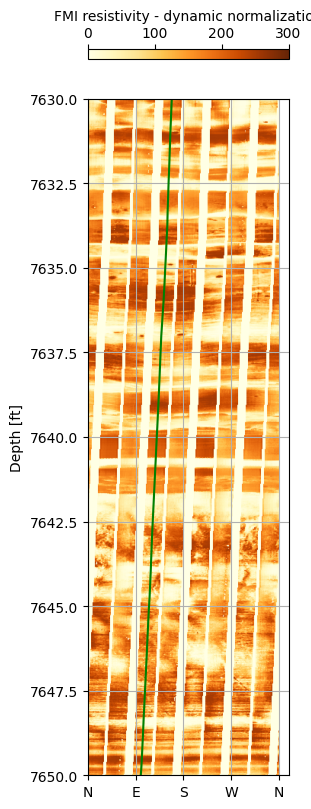

In [20]:

#generate graphs from sample graph https://github.com/ICWallis/borehole-image-analysis-with-python/blob/main/7_DLIS_files.ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

import logging


def paint_channel(ax, curve, y_axis, x_axis, **kwargs):
    """Plot an image channel into an axes using an index channel for the y-axis

    Parameters
    ----------²

        ax : matplotlib.axes

        curve : numpy array
            The curve to be plotted

        index : numpy array
            The depth index as a Channel object (slower) or a numpy array (faster)

        **kwargs : dict
            Keyword arguments to be passed on to ax.imshow()
    """
    # Determine the extent of the image so that the pixel centres correspond with the correct axis values
    dx = np.mean(x_axis[1:] - x_axis[:-1])
    dy = np.mean(y_axis[1:] - y_axis[:-1])
    extent = (x_axis[0] - dx/2, x_axis[-1] + dx/2, y_axis[0] - dy/2, y_axis[-1] + dy/2)

    # Determine the correct orientation of the image
    if y_axis[1] < y_axis[0]:   # Frame recorded from the bottom to the top of the well
        origin = 'lower'
    else:                       # Frame recorded from the top to the bottom of the well
        origin = 'upper'

    return ax.imshow(curve, aspect='auto', origin=origin, extent=extent, **kwargs)


# Plot the image log
fig, ax = plt.subplots(1,1, figsize=(3,8), sharey=True, constrained_layout=True)

ang = np.arange(20)

"""
The original fuction used a image which is oriented
The current understanding of the problem only made possible plot each cleaned channel assuming a width to cover the 360°
As it is mentioned this image show an unoriented plot of the channels
"""

#imfa = paint_channel(ax, fmfa_curvesclean, depth, np.arange(40, 75), cmap='YlOrBr', vmin=0, vmax=300)
impa = paint_channel(ax, result, depth, np.arange(360),cmap='YlOrBr', vmin=0, vmax=300)
#imfb = paint_channel(ax, fmfb_curvesclean, depth, np.arange(90,125), cmap='YlOrBr', vmin=0, vmax=300)
#impb = paint_channel(ax, fmpb_curvesclean, depth, np.arange(130,165), cmap='YlOrBr', vmin=0, vmax=300)
#imfc = paint_channel(ax, fmfc_curvesclean, depth, np.arange(180, 215), cmap='YlOrBr', vmin=0, vmax=300)
#impc = paint_channel(ax, fmpc_curvesclean, depth, np.arange(220, 255), cmap='YlOrBr', vmin=0, vmax=300)
#imfd = paint_channel(ax, fmfd_curvesclean, depth, np.arange(270,305), cmap='YlOrBr', vmin=0, vmax=300)
#impd = paint_channel(ax, fmpd_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=0, vmax=300)
imp1 = ax.plot( P1NO_curvesclean, depth, color ="green")
"""
imfe = paint_channel(ax, fmfe_curvesclean, depth, np.arange(580,615), cmap='YlOrBr', vmin=-500, vmax=1000)
impe = paint_channel(ax, fmpe_curvesclean, depth, np.arange(540, 575), cmap='YlOrBr', vmin=-500, vmax=1000)
imff = paint_channel(ax, fmff_curvesclean, depth, np.arange(490, 525), cmap='YlOrBr', vmin=-500, vmax=1000)
impf = paint_channel(ax, fmpf_curvesclean, depth, np.arange(450, 485), cmap='YlOrBr', vmin=-500, vmax=1000)
imfg = paint_channel(ax, fmfg_curvesclean, depth, np.arange(400,435),cmap='YlOrBr', vmin=-500, vmax=1000)
impg = paint_channel(ax, fmpg_curvesclean, depth, np.arange(360, 395),  cmap='YlOrBr', vmin=-500, vmax=1000)
imfh = paint_channel(ax, fmfh_curvesclean, depth, np.arange(310, 345), cmap='YlOrBr', vmin=-500, vmax=1000)
imph = paint_channel(ax, fmph_curvesclean, depth, np.arange(270, 305), cmap='YlOrBr', vmin=-500, vmax=1000)
"""
cbar = fig.colorbar(imfa, ax=ax, location='top')
cbar.set_label('FMI resistivity - dynamic normalization')
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_xticklabels(['N', 'E', 'S', 'W', 'N'])

ax.grid(True)

#ax.set_xlabel('Azimuthal angle from north [°]')
ax.set_ylabel('Depth [ft]')

ax.set_ylim(7650, 7630)

plt.show()